# Exploratory Data Analysis

## Imports

In [39]:
import preprocessing as prep
import numpy as np
import pandas as pd
import nltk
import string
import pickle
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(42)

In [40]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('../data/raw.csv', encoding='latin1')
df.columns = ['tweet', 'product', 'emotion']

In [4]:
df.head(20)

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


## Analysis of Positive and Negative Reviews

In [5]:
negative = df[df['emotion'] == 'Negative emotion']
positive = df[df['emotion'] == 'Positive emotion']

In [6]:
xpos = positive['tweet']
xneg = negative['tweet']

In [7]:
xpos.head()

1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
7    #SXSW is just starting, #CTIA is around the co...
8    Beautifully smart and simple idea RT @madebyma...
Name: tweet, dtype: object

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/stlanier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
xpos = [x.lower() for x in xpos]
xpos_tokens = [word_tokenize(x) for x in xpos]
xneg = [x.lower() for x in xneg]
xneg_tokens = [word_tokenize(x) for x in xneg]

In [14]:
## xpos and xneg are 2D arrays now, but they need to be 1D for FreqDist(). I make them 1D here.
xpos_tokens_total = []
for x in xpos_tokens:
    xpos_tokens_total += x
    
xneg_tokens_total = []
for x in xneg_tokens:
    xneg_tokens_total += x

In [15]:
fd_pos = FreqDist(xpos_tokens_total)
fd_neg = FreqDist(xneg_tokens_total)

In [16]:
print(f'There are {len(set(xpos_tokens_total))} unique tokens for positive reviews.')
fd_pos.most_common(40)

There are 5518 unique tokens for positive reviews.


[('#', 5025),
 ('sxsw', 3105),
 ('@', 2220),
 ('mention', 2194),
 ('.', 2119),
 ('the', 1596),
 ('!', 1266),
 ('link', 1217),
 ('{', 1213),
 ('}', 1213),
 ('to', 1159),
 (',', 1100),
 ('at', 1023),
 ('ipad', 1003),
 ('rt', 937),
 ('apple', 925),
 ('for', 908),
 ('a', 784),
 (';', 781),
 ('&', 736),
 ('google', 716),
 ('is', 654),
 ('of', 639),
 ('in', 632),
 ('i', 625),
 (':', 613),
 ('and', 581),
 ('store', 545),
 ('iphone', 523),
 ("'s", 493),
 ('it', 472),
 ('2', 465),
 ('quot', 464),
 ('on', 442),
 ('app', 396),
 ('new', 360),
 ('?', 343),
 ('-', 330),
 ('an', 329),
 ('you', 327)]

In [17]:
print(f'There are {len(set(xneg_tokens_total))} unique tokens for negative reviews.')
fd_neg.most_common(40)

There are 2267 unique tokens for negative reviews.


[('#', 912),
 ('sxsw', 581),
 ('.', 490),
 ('@', 315),
 ('mention', 313),
 ('the', 308),
 ('to', 256),
 (',', 221),
 (';', 212),
 ('&', 209),
 ('ipad', 188),
 ('i', 177),
 ('quot', 175),
 ('is', 169),
 ('iphone', 162),
 ('a', 154),
 ('google', 145),
 ('at', 142),
 ('rt', 138),
 ('of', 132),
 ('apple', 120),
 ('for', 120),
 ('in', 120),
 ('?', 119),
 ('it', 111),
 (':', 111),
 ('{', 102),
 ('link', 102),
 ('}', 102),
 ('my', 102),
 ('on', 100),
 ('!', 95),
 ('and', 95),
 ("n't", 87),
 ('not', 81),
 ("'s", 77),
 ('an', 73),
 ('that', 63),
 ('-', 62),
 ('app', 60)]

The two frequency distributions have a lot in common––mostly stop words, punctuation, and brand names––though there are some notable differences: for example, "!" is one of the most common tokens in positive reviews, but not negative ones; "not" and "n't" are two of the most common tokens in negative reviews, but not positive ones.

To get a better idea of the different tokens in these two groups, I remove stop words and punctuation (except "!") from both lists.

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stlanier/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
stopwords_list = stopwords.words('english') + ['sxsw']
stopwords_list += list(string.punctuation[1:])

In [21]:
xpos_tokens_total = [x for x in xpos_tokens_total if x not in stopwords_list]
xneg_tokens_total = [x for x in xneg_tokens_total if x not in stopwords_list]

In [22]:
for review in xpos:
    review = [x for x in review if x not in stopwords_list]
for review in xneg:
    review = [x for x in review if x not in stopwords_list]

In [23]:
fd_pos = FreqDist(xpos_tokens_total)
fd_neg = FreqDist(xneg_tokens_total)

In [24]:
print(f'There are {len(set(xpos_tokens_total))} unique tokens for positive reviews.')
fd_pos.most_common(40)

There are 5369 unique tokens for positive reviews.


[('mention', 2194),
 ('!', 1266),
 ('link', 1217),
 ('ipad', 1003),
 ('rt', 937),
 ('apple', 925),
 ('google', 716),
 ('store', 545),
 ('iphone', 523),
 ("'s", 493),
 ('2', 465),
 ('quot', 464),
 ('app', 396),
 ('new', 360),
 ('austin', 294),
 ('amp', 211),
 ('ipad2', 209),
 ('...', 208),
 ('android', 198),
 ('launch', 160),
 ('get', 157),
 ("n't", 152),
 ('pop-up', 151),
 ('one', 146),
 ('great', 137),
 ('party', 132),
 ('line', 131),
 ('time', 128),
 ('free', 125),
 ('social', 124),
 ('via', 120),
 ('cool', 120),
 ('circles', 117),
 ("'m", 116),
 ('like', 114),
 ('today', 113),
 ('maps', 105),
 ('mobile', 101),
 ('day', 101),
 ('sxswi', 95)]

In [25]:
print(f'There are {len(set(xneg_tokens_total))} unique tokens for negative reviews.')
fd_neg.most_common(40)

There are 2130 unique tokens for negative reviews.


[('mention', 313),
 ('ipad', 188),
 ('quot', 175),
 ('iphone', 162),
 ('google', 145),
 ('rt', 138),
 ('apple', 120),
 ('link', 102),
 ('!', 95),
 ("n't", 87),
 ("'s", 77),
 ('app', 60),
 ('2', 58),
 ('store', 46),
 ('new', 43),
 ('like', 39),
 ('...', 38),
 ('circles', 34),
 ('social', 31),
 ('apps', 30),
 ('people', 29),
 ('design', 28),
 ('need', 25),
 ('android', 24),
 ('austin', 24),
 ('get', 24),
 ('one', 23),
 ('amp', 22),
 ('launch', 22),
 ('would', 21),
 ("'ve", 18),
 ('news', 18),
 ('today', 18),
 ('time', 18),
 ('think', 18),
 ('headaches', 17),
 ('go', 17),
 ('long', 17),
 ('fail', 17),
 ('line', 16)]

These two lists are a little more telling now. The brand names are still included, but otherwise these two lists appear to be more robust than before. With more time, it would be interesting to investigate what bigrams reveal about these two groups, or how positive/negative reviews break down by brand/product. 

## N-grams

### Bigrams

In [26]:
xpos[0]

"@jessedee know about @fludapp ? awesome ipad/iphone app that you'll likely appreciate for its design. also, they're giving free ts at #sxsw"

In [27]:
bi_pos = prep.ngrams(xpos, (2,2))
bi_pos.head(15)

,term,rank
15462,rt mention,74.569038
2091,at sxsw,57.726800
17345,sxsw link,42.639433
6070,for sxsw,30.302648
1678,apple store,29.502341
14440,pop up,28.789235
10574,link sxsw,26.859032
18367,the ipad,25.016994
915,an ipad,24.963985
11831,mention sxsw,23.222932


In [28]:
bi_neg = prep.ngrams(xneg, (2,2))
bi_neg.head(15)

,term,rank
4453,rt mention,13.624611
558,at sxsw,9.644837
5265,the ipad,5.209570
3504,my iphone,4.872888
227,an ipad,4.716609
3357,mention sxsw,4.694570
4941,sxsw link,4.600153
2433,ipad design,4.348503
3015,link sxsw,4.347195
429,apple store,4.094664


### Trigrams

In [29]:
tri_pos = prep.ngrams(xpos, (3,3))
tri_pos.head(15)

,term,rank
20014,pop up store,18.393926
17566,new social network,14.123737
14433,link via mention,13.571505
9431,google to launch,12.781024
3362,austin for sxsw,12.349795
3077,at sxsw link,12.284168
2302,apple pop up,12.222220
22530,social network called,11.865694
17398,network called circles,11.865694
13856,launch major new,11.457592


In [30]:
tri_neg = prep.ngrams(xneg, (3,3))
tri_neg.head(15)

,term,rank
2786,ipad design headaches,3.706676
5218,rt mention google,3.045413
1271,company in america,2.984018
1819,fascist company in,2.883469
2833,ipad news apps,2.721885
4227,new social network,2.533542
3642,major new social,2.342176
4200,network called circles,2.245119
5485,social network called,2.245119
1793,fades fast among,2.171848


### 4-grams

In [31]:
any_gram_pos = prep.ngrams(xpos, (4,4))
any_gram_pos.head(15)

,term,rank
23572,social network called circles,11.790039
18272,new social network called,11.790039
14323,launch major new social,11.379907
15416,major new social network,11.379907
28305,to launch major new,11.174921
9770,google to launch major,10.928146
13522,it even begins apple,10.802574
4177,before it even begins,10.802574
24125,store in downtown austin,10.567889
2318,apple pop up store,10.201890


In [32]:
any_gram_neg = prep.ngrams(xneg, (4,4))
any_gram_neg.head(15)

,term,rank
1761,fascist company in america,2.654346
5361,social network called circles,2.267296
4100,new social network called,2.267296
2738,ipad news apps fades,2.215370
4113,news apps fades fast,2.215370
4301,of ipad news apps,2.215370
548,apps fades fast among,2.215370
4238,novelty of ipad news,2.215370
1200,classiest fascist company in,2.106193
3282,launch major new social,2.064618


## Comparison of review lengths

In [41]:
xpos_lengths = [len(x) for x in xpos]
xneg_lengths = [len(x) for x in xneg]

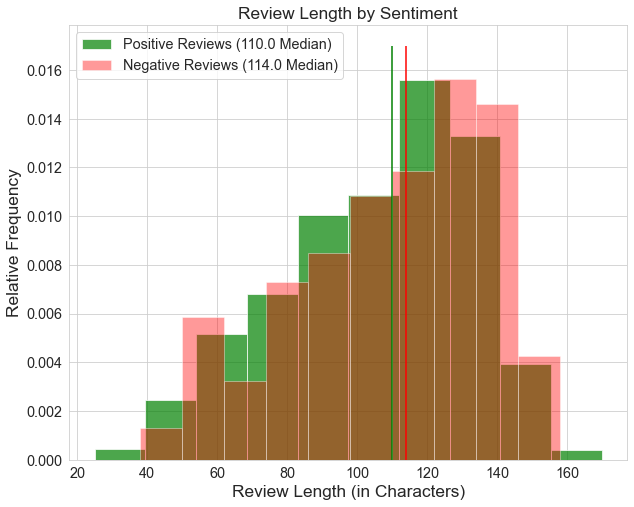

In [95]:
fig, ax = plt.subplots(1, figsize=(10,8))
plt.hist(xpos_lengths, label=f'Positive Reviews ({np.median(xpos_lengths)//1} Median) ', color='green', alpha=.7, density=True)
plt.hist(xneg_lengths, label=f'Negative Reviews ({np.median(xneg_lengths)//1} Median)', color='red', alpha=.4, density=True)

plt.vlines(110, 0, .017, color='green')
plt.vlines(114, 0, .017, color='red')

plt.legend(fontsize='x-large')
plt.xlabel('Review Length (in Characters)', fontsize='xx-large')
plt.ylabel('Relative Frequency',fontsize='xx-large')
plt.title('Review Length by Sentiment',fontsize='xx-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')

plt.savefig('../images/length_comparison.png')

The negative reviews appears to be centered at a slightly higher review length than the positive reviews.